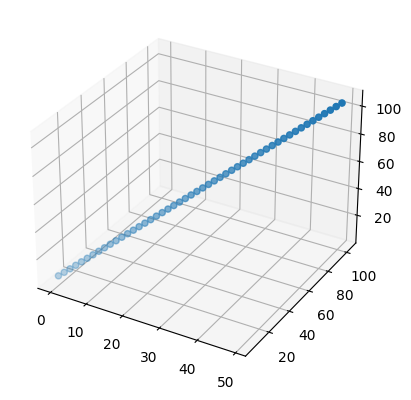

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(50)
y1 = X*2 + 5
y2 = X*2 + 6

ax = plt.axes(projection='3d')
ax.scatter3D(X, y1, y2)

In [2]:
def parameters():
    w1 = np.random.rand()
    b1 = 0
    
    w2 = np.random.rand()
    b2 = 0
    return w1, b1, w2, b2

def loss(o, p):
    return (o - p)**2

def gradient_descent(o, p, w, b):
    w = -2 * (o - p) * w
    b = -2 * (o - p)
    return w, b

def step(w1, b1, w2, b2, sw1, sb1, sw2, sb2):
    w1 = w1 - sw1
    b1 = b1 - sb1
    
    w2 = w2 - sw2
    b2 = b2 - sb2
    return w1, b1, w2, b2

w1: 2.0001950966303426 w2: 2.16804204334502 b1: 4.995220132556596 b2: 1.8829699380470077


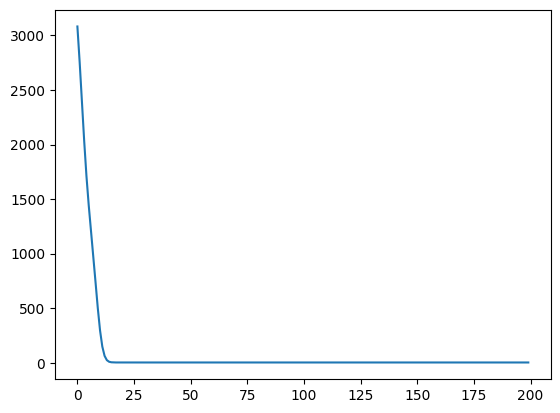

In [3]:
np.random.seed(42069)
w1, b1, w2, b2 = parameters()
lr = 0.0001
losses = []
for epoch in range(200):
    y1_predicted = X*w1 + b1
    y2_predicted = X*w2 + b2
   
    err_y1 = loss(y1, y1_predicted)
    err_y2 = loss(y2, y2_predicted)
    err = np.sum(err_y1) + np.sum(err_y2)
    len_err = len(err_y1) + len(err_y2)
    losses.append(err / len_err)
    
    dw1, db1 = gradient_descent(y1, y1_predicted, w1, b1)
    dw2, db2 = gradient_descent(y2, y2_predicted, w2, b2)
    
    sw1 = np.sum(dw1) * lr
    sb1 = np.sum(db1) * lr
    sw2 = np.sum(dw2) * lr
    sb2 = np.sum(db2) * lr
    
    w1, b1, w2, b2 = step(w1, b1, w2, b2, sw1, sb1, sw2, sb2)
    
print('w1:', w1, 'w2:', w2, 'b1:', b1, 'b2:', b2)
plt.plot(losses)

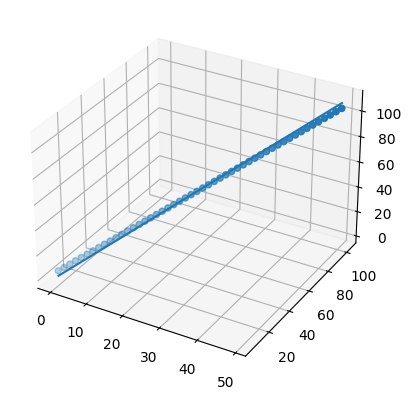

In [4]:
y1_r = X*w1 + b1
y2_r = X*w2 + b2

ax = plt.axes(projection='3d')
ax.scatter3D(X, y1, y2)
ax.plot3D(X, y1_r, y2_r)